# Setup

## Import packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import and check data

In [4]:
maps_file = 'data/maps_data.xlsx'
pillar_file = 'data/pillar_marks_completed.csv'

maps_df = pd.read_excel(maps_file)
pillar_df = pd.read_csv(pillar_file)

In [5]:
maps_df.head()

,Unnamed: 0,map_name,matchup,patch,wins,losses,games,win_perc,loss_perc
0,12,Abyssal Reef LE,PvT,3.11,1070,1162,2232,0.4794,0.5206
1,19,Abyssal Reef LE,PvZ,3.11,1260,1340,2600,0.4846,0.5154
2,26,Abyssal Reef LE,TvZ,3.11,1656,1916,3572,0.4636,0.5364
3,87,Bel'Shir Vestige LE (Void),PvT,3.11,1276,1243,2519,0.5066,0.4934
4,90,Bel'Shir Vestige LE (Void),PvZ,3.11,1285,1407,2692,0.4773,0.5227


In [6]:
pillar_df.head()

,Map Name,Pillar,comment
0,16-Bit LE,Pillar can see natural entrance,In base natural
1,Abiogenesis LE,Pillar can see natural entrance,NaN
2,Abyssal Reef LE,No pillar,NaN
3,Acid Plant LE,Pillar can see natural entrance,NaN
4,Acolyte LE,Pillar can see natural entrance,In base natural


# Functions

In [7]:
def assign_pillar(map):
    pillar_mark = pillar_df[pillar_df['Map Name'] == map]['Pillar'].iloc[0]
    return pillar_mark

In [8]:
# split matchup

def split_matchup_first(matchup):
    race = matchup.split('v')[0]
    
    if race == 'T':
        return 'Terran'
    elif race == 'Z':
        return 'Zerg'
    else:
        return 'Protoss'

In [9]:
def split_matchup_second(matchup):
    race = matchup.split('v')[1]
    
    if race == 'T':
        return 'Terran'
    elif race == 'Z':
        return 'Zerg'
    else:
        return 'Protoss'

# Data Cleaning

In [10]:
list(maps_df.columns)[0]

'Unnamed: 0'

In [11]:
# drop artifact column
maps_df.drop(columns = list(maps_df.columns)[0], inplace=True)

In [12]:
# append pillar
maps_df['pillar_label'] = maps_df['map_name'].apply(assign_pillar)
maps_df.head()

,map_name,matchup,patch,wins,losses,games,win_perc,loss_perc,pillar_label
0,Abyssal Reef LE,PvT,3.11,1070,1162,2232,0.4794,0.5206,No pillar
1,Abyssal Reef LE,PvZ,3.11,1260,1340,2600,0.4846,0.5154,No pillar
2,Abyssal Reef LE,TvZ,3.11,1656,1916,3572,0.4636,0.5364,No pillar
3,Bel'Shir Vestige LE (Void),PvT,3.11,1276,1243,2519,0.5066,0.4934,Pillar can see natural entrance
4,Bel'Shir Vestige LE (Void),PvZ,3.11,1285,1407,2692,0.4773,0.5227,Pillar can see natural entrance


In [13]:
# apply matchups

maps_df['race_a'] = maps_df.matchup.apply(split_matchup_first)
maps_df['race_b'] = maps_df.matchup.apply(split_matchup_second)

maps_df.head()

,map_name,matchup,patch,wins,losses,games,win_perc,loss_perc,pillar_label,race_a,race_b
0,Abyssal Reef LE,PvT,3.11,1070,1162,2232,0.4794,0.5206,No pillar,Protoss,Terran
1,Abyssal Reef LE,PvZ,3.11,1260,1340,2600,0.4846,0.5154,No pillar,Protoss,Zerg
2,Abyssal Reef LE,TvZ,3.11,1656,1916,3572,0.4636,0.5364,No pillar,Terran,Zerg
3,Bel'Shir Vestige LE (Void),PvT,3.11,1276,1243,2519,0.5066,0.4934,Pillar can see natural entrance,Protoss,Terran
4,Bel'Shir Vestige LE (Void),PvZ,3.11,1285,1407,2692,0.4773,0.5227,Pillar can see natural entrance,Protoss,Zerg


# Exploratory Data Analysis

In [14]:
maps_df[['wins', 'losses', 'win_perc', 'loss_perc']].describe()

,wins,losses,win_perc,loss_perc
count,447.000000,447.000000,447.000000,447.000000
mean,5954.859060,5785.398210,0.506049,0.493951
std,5903.359792,5661.381863,0.059901,0.059901
min,0.000000,0.000000,0.000000,0.000000
25%,1719.500000,1796.500000,0.483800,0.475700
50%,3260.000000,3198.000000,0.502500,0.497500
75%,8947.500000,8447.500000,0.524300,0.516200
max,30248.000000,29041.000000,1.000000,1.000000


In [15]:
total_avg = maps_df.wins.sum() / (maps_df.wins.sum() + maps_df.losses.sum())
total_avg

0.5072170841832773

In [16]:
maps_df.sort_values(by='games', ascending=False)

,map_name,matchup,patch,wins,losses,games,win_perc,loss_perc,pillar_label,race_a,race_b
260,Ever Dream LE,TvZ,4.11.4,30248,28468,58716,0.5152,0.4848,Pillar can see natural entrance,Terran,Zerg
257,Eternal Empire LE,TvZ,4.11.4,29887,26822,56709,0.5270,0.4730,Pillar can see natural entrance,Terran,Zerg
259,Ever Dream LE,PvZ,4.11.4,26475,29041,55516,0.4769,0.5231,Pillar can see natural entrance,Protoss,Zerg
258,Ever Dream LE,PvT,4.11.4,29732,24746,54478,0.5458,0.4542,Pillar can see natural entrance,Protoss,Terran
255,Eternal Empire LE,PvT,4.11.4,29262,25099,54361,0.5383,0.4617,Pillar can see natural entrance,Protoss,Terran
...,...,...,...,...,...,...,...,...,...,...,...
199,Odyssey LE,PvZ,4.1.4,1,1,2,0.5000,0.5000,Pillar can see natural entrance,Protoss,Zerg
174,Abyssal Reef LE,PvT,4.1.4,1,1,2,0.5000,0.5000,No pillar,Protoss,Terran
198,Odyssey LE,PvT,4.1.4,1,0,1,1.0000,0.0000,Pillar can see natural entrance,Protoss,Terran
175,Abyssal Reef LE,PvZ,4.1.4,1,0,1,1.0000,0.0000,No pillar,Protoss,Zerg


In [17]:
# number of unique maps
len(maps_df.map_name.unique())

70

In [18]:
maps_df.groupby('map_name')[['wins', 'losses', 'games']].sum().describe()

,wins,losses,games
count,70.000000,70.000000,70.000000
mean,38026.028571,36943.900000,74969.928571
std,29870.795288,28448.029215,58299.362085
min,1967.000000,2063.000000,4030.000000
25%,11210.750000,11343.000000,22556.750000
50%,26550.000000,26162.500000,52583.500000
75%,57715.000000,56439.000000,114652.500000
max,136025.000000,126537.000000,262562.000000


In [19]:
unique_maps = maps_df.groupby(['map_name', 'pillar_label'])[['wins', 'losses', 'games']].sum().reset_index()
unique_maps

,map_name,pillar_label,wins,losses,games
0,16-Bit LE,Pillar can see natural entrance,25333,23255,48588
1,Abiogenesis LE,Pillar can see natural entrance,25911,27497,53408
2,Abyssal Reef LE,No pillar,65783,67312,133095
3,Acid Plant LE,Pillar can see natural entrance,88823,86559,175382
4,Acolyte LE,Pillar can see natural entrance,16093,14478,30571
...,...,...,...,...,...
65,Whirlwind LE (Void),Pillar can see natural entrance,1967,2063,4030
66,Winter's Gate LE,Pillar can see natural entrance,21275,20994,42269
67,World of Sleepers LE,Pillar can see natural entrance,57742,56984,114726
68,Year Zero LE,Pillar can see natural entrance,25510,24079,49589


In [20]:
# see how many maps have each pillar mark
unique_maps.pillar_label.value_counts()

Pillar can see natural entrance       51
No pillar                             13
Pillar cannot see natural entrance     6
Name: pillar_label, dtype: int64

In [21]:
# append win perc to unique maps
unique_maps['win_perc'] = unique_maps.wins / (unique_maps.wins + unique_maps.losses)

In [22]:
# top 15 played maps in dataset
unique_maps.sort_values(by='games', ascending=False).head(n=15)

,map_name,pillar_label,wins,losses,games,win_perc
28,Eternal Empire LE,Pillar can see natural entrance,136025,126537,262562,0.518068
29,Ever Dream LE,Pillar can see natural entrance,113065,106895,219960,0.514025
37,Kairos Junction LE,Pillar can see natural entrance,92471,88436,180907,0.511152
16,Catalyst LE,Pillar can see natural entrance,91444,88249,179693,0.508890
58,Simulacrum LE,Pillar can see natural entrance,89119,86836,175955,0.506487
3,Acid Plant LE,Pillar can see natural entrance,88823,86559,175382,0.506454
45,Nightshade LE,Pillar can see natural entrance,83834,78424,162258,0.516671
27,Ephemeron LE,Pillar can see natural entrance,70943,67143,138086,0.513760
2,Abyssal Reef LE,No pillar,65783,67312,133095,0.494256
62,Triton LE,Pillar can see natural entrance,67354,63880,131234,0.513236


In [30]:
# top 15 maps pillar value counts
unique_maps.sort_values(by='games', ascending=False).head(n=15).pillar_label.value_counts()

Pillar can see natural entrance       13
Pillar cannot see natural entrance     1
No pillar                              1
Name: pillar_label, dtype: int64

In [24]:
unique_maps.describe()

,wins,losses,games,win_perc
count,70.000000,70.000000,70.000000,70.000000
mean,38026.028571,36943.900000,74969.928571,0.503571
std,29870.795288,28448.029215,58299.362085,0.013495
min,1967.000000,2063.000000,4030.000000,0.464358
25%,11210.750000,11343.000000,22556.750000,0.496256
50%,26550.000000,26162.500000,52583.500000,0.504700
75%,57715.000000,56439.000000,114652.500000,0.512627
max,136025.000000,126537.000000,262562.000000,0.528747


In [25]:
unique_maps.games.sum()

5247895

In [52]:
# win rate by patch
patch_df = maps_df.groupby(['patch', 'matchup'])[[
    'map_name', 'matchup', 'patch', 'wins', 'losses', 'pillar_label'
    ]]\
    .sum()\
    .reset_index()

# calculate new win rates
patch_df['win_rate'] = round(
                            (patch_df['wins'] / (patch_df['wins'] + patch_df['losses'])),
                            3
                            )

patch_df.head()

,patch,matchup,wins,losses,win_rate
0,3.11,PvT,7242,7211,0.501
1,3.11,PvZ,7473,8023,0.482
2,3.11,TvZ,10701,11457,0.483
3,3.12,PvT,17332,17108,0.503
4,3.12,PvZ,16815,17684,0.487


In [53]:
# check min/max values by patches
patch_df.describe()

,wins,losses,win_rate
count,39.000000,39.000000,39.000000
mean,68251.846154,66309.564103,0.502641
std,61413.545419,58840.994133,0.023201
min,7242.000000,7211.000000,0.457000
25%,18527.500000,19348.000000,0.487000
50%,36793.000000,39198.000000,0.501000
75%,119618.000000,116882.500000,0.516500
max,198031.000000,196358.000000,0.555000


In [56]:
patch_df.sort_values(by='win_rate').head()

,patch,matchup,wins,losses,win_rate
13,4.0,PvZ,13336,15858,0.457
16,4.1.1,PvZ,27739,31830,0.466
19,4.1.4,PvZ,16874,19132,0.469
25,4.11.4,PvZ,156008,170730,0.477
22,4.10.1,PvZ,117211,127027,0.480


In [58]:
patch_df.sort_values(by='win_rate', ascending=False).head()

,patch,matchup,wins,losses,win_rate
12,4.0,PvT,15942,12770,0.555
15,4.1.1,PvT,31744,26720,0.543
24,4.11.4,PvT,178392,152576,0.539
36,5.0.2,PvT,71351,61387,0.538
33,4.8.3,PvT,122025,105392,0.537


In [81]:
# assign the same for loss perc to see zerg centric stats
patch_df['loss_rate'] = 1 - patch_df.win_rate
patch_df.head()

,patch,matchup,wins,losses,win_rate,loss_rate
0,3.11,PvT,7242,7211,0.501,0.499
1,3.11,PvZ,7473,8023,0.482,0.518
2,3.11,TvZ,10701,11457,0.483,0.517
3,3.12,PvT,17332,17108,0.503,0.497
4,3.12,PvZ,16815,17684,0.487,0.513


In [84]:
patch_df.sort_values(by='loss_rate').head()

,patch,matchup,wins,losses,win_rate,loss_rate
12,4.0,PvT,15942,12770,0.555,0.445
15,4.1.1,PvT,31744,26720,0.543,0.457
24,4.11.4,PvT,178392,152576,0.539,0.461
36,5.0.2,PvT,71351,61387,0.538,0.462
33,4.8.3,PvT,122025,105392,0.537,0.463


In [85]:
patch_df.sort_values(by='loss_rate', ascending=False).head()

,patch,matchup,wins,losses,win_rate,loss_rate
13,4.0,PvZ,13336,15858,0.457,0.543
16,4.1.1,PvZ,27739,31830,0.466,0.534
19,4.1.4,PvZ,16874,19132,0.469,0.531
25,4.11.4,PvZ,156008,170730,0.477,0.523
22,4.10.1,PvZ,117211,127027,0.480,0.520


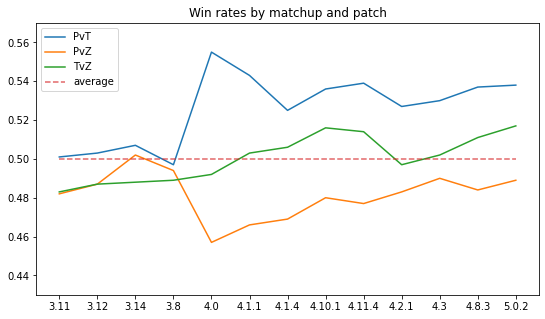

In [111]:
# plot win rates by patch

matchups = list(patch_df.matchup.unique())
x = list(patch_df.patch.astype(str).unique())

ref_line = [0.5 for x in range(len(patch_df.patch.unique()))]

plt.figure(figsize=(9,5))

pvt_win_rate = patch_df[patch_df.matchup == 'PvT'].win_rate
#pvt_win_rate = list(pvt_df.win_rate)

for matchup in matchups:
    win_rates = patch_df[patch_df.matchup == matchup].win_rate
    plt.plot(x, win_rates, label=matchup)
    
plt.plot(x, ref_line, label = 'average', ls='dashed', alpha=0.7)
plt.ylim(0.43, 0.57)    

plt.title('Win rates by matchup and patch')
plt.legend()

<Figure size 432x288 with 0 Axes>

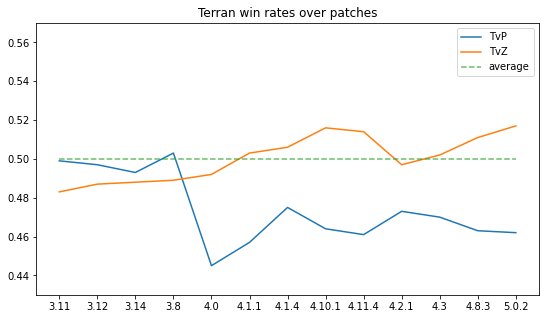

In [119]:
# plot win rates per patch for each matchup
# tvz, tvp

plt.clf() # clear figure

plt.figure(figsize=(9,5))

tvp = patch_df[patch_df.matchup == 'PvT'].loss_rate
tvz = patch_df[patch_df.matchup == 'TvZ'].win_rate

ref_line = [0.5 for x in range(len(patch_df.patch.unique()))]

plt.plot(x, tvp, label= 'TvP')
plt.plot(x, tvz, label = 'TvZ')
plt.plot(x, ref_line, label = 'average', ls='dashed', alpha=0.7)

plt.ylim(0.43, 0.57) 

plt.title('Terran win rates over patches')
plt.legend()

plt.savefig('plot_figures/tvx_win_rates.png')
plt.show()


<Figure size 432x288 with 0 Axes>

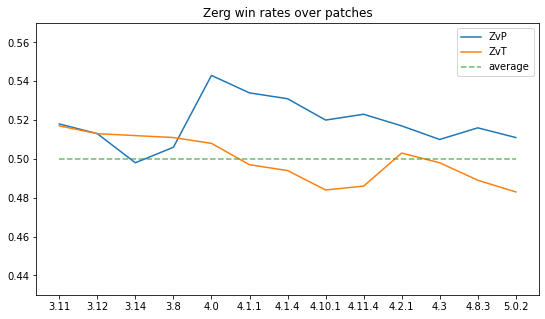

In [120]:
# zvp, zvt

plt.clf() # clear figure

plt.figure(figsize=(9,5))

zvp = patch_df[patch_df.matchup == 'PvZ'].loss_rate
zvt = patch_df[patch_df.matchup == 'TvZ'].loss_rate

ref_line = [0.5 for x in range(len(patch_df.patch.unique()))]

plt.plot(x, zvp, label= 'ZvP')
plt.plot(x, zvt, label = 'ZvT')
plt.plot(x, ref_line, label = 'average', ls='dashed', alpha=0.7)

plt.ylim(0.43, 0.57) 

plt.title('Zerg win rates over patches')
plt.legend()

plt.savefig('plot_figures/zvx_win_rates.png')
plt.show()

<Figure size 432x288 with 0 Axes>

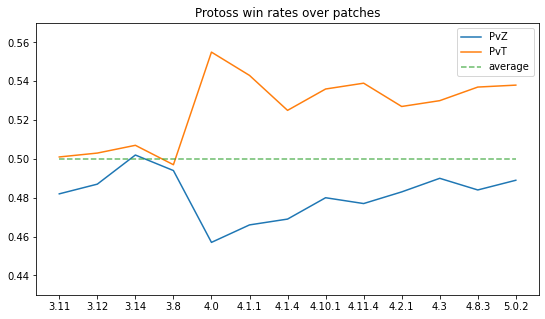

In [122]:
# pvt, pvz

plt.clf() # clear figure

plt.figure(figsize=(9,5))

pvz = patch_df[patch_df.matchup == 'PvZ'].win_rate
pvt = patch_df[patch_df.matchup == 'PvT'].win_rate

ref_line = [0.5 for x in range(len(patch_df.patch.unique()))]

plt.plot(x, pvz, label= 'PvZ')
plt.plot(x, pvt, label = 'PvT')
plt.plot(x, ref_line, label = 'average', ls='dashed', alpha=0.7)

plt.ylim(0.43, 0.57) 

plt.title('Protoss win rates over patches')
plt.legend()

plt.savefig('plot_figures/pvx_win_rates.png')
plt.show()

In [26]:
# win rate of pillar vs no pillar

# win rate of pillar differentiation

# combine pillar with pillar that can't see nat entrance

In [27]:
# win rates by matchup and map

In [28]:
# group by patch to see win %

In [29]:
# plot each matchup win rate by patch avg win rate